# Exercise 6.5 Machine Learning Clustering

This script contains

1. Importing libraries
2. Data preprocessing
3. Elbow technique
4. k-means clustering
5. Interpretation and next steps

# 01. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# path to EPI folders
path = r"C:\Users\alabaro\OneDrive - DAI\Documents\EPI Analysis"

In [4]:
# import data file
df_epi_pop_gini = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'epi_pop_gini.pkl'))

# 02. Data preprocessing

Index(['code', 'country_code', 'country_x', 'region', 'EPI.new', 'HLT.new',
       'AIR.new', 'HAD.new', 'PMD.new', 'OZD.new',
       ...
       'BCA.rnk.old', 'GHN.rnk.old', 'LCB.rnk.old', 'GIB.rnk.old',
       'GHP.rnk.old', 'country_name', 'pop_2022', '_merge', 'country_y',
       'gini'],
      dtype='object', length=284)

In [6]:
pd.set_option('display.max_rows', None)

In [7]:
df_epi_pop_gini.head(2)

,code,country_code,country_x,region,EPI.new,HLT.new,AIR.new,HAD.new,PMD.new,OZD.new,...,BCA.rnk.old,GHN.rnk.old,LCB.rnk.old,GIB.rnk.old,GHP.rnk.old,country_name,pop_2022,_merge,country_y,gini
0,4,AFG,Afghanistan,Southern Asia,43.6,16.0,15.5,7.4,16.0,18.4,...,142,112,12.0,129,1,Afghanistan,41128771,both,Afghanistan,NaN
1,24,AGO,Angola,Sub-Saharan Africa,30.5,20.5,23.1,17.9,24.0,36.8,...,105,119,135.0,1,87,Angola,35588987,both,Angola,51.3


In [8]:
# Drop columns from the dataframe

df_epi_pop_gini.drop(columns = ['code', 'country_code', 'country_x', 'region', 'country_name', '_merge', 'country_y'])

,EPI.new,HLT.new,AIR.new,HAD.new,PMD.new,OZD.new,NOE.new,SOE.new,COE.new,VOE.new,...,CHA.rnk.old,FGA.rnk.old,NDA.rnk.old,BCA.rnk.old,GHN.rnk.old,LCB.rnk.old,GIB.rnk.old,GHP.rnk.old,pop_2022,gini
0,43.6,16.0,15.5,7.4,16.0,18.4,37.8,61.2,42.7,37.5,...,164,NaN,141,142,112,12.0,129,1,41128771,NaN
1,30.5,20.5,23.1,17.9,24.0,36.8,32.4,60.2,30.3,8.3,...,35,77.0,132,105,119,135.0,1,87,35588987,51.300000
2,47.1,40.0,37.5,34.5,36.7,63.7,29.5,43.3,61.5,46.9,...,26,77.0,70,173,39,37.0,25,67,2775634,29.866667
3,52.4,49.4,41.7,100.0,3.4,20.4,0.0,14.0,25.7,13.1,...,112,37.0,163,134,157,162.0,141,173,9441129,26.000000
4,41.1,56.3,52.0,60.5,48.2,51.8,22.8,68.5,66.2,16.3,...,107,59.0,128,1,160,128.0,93,134,46234830,42.125000
5,48.3,40.7,32.1,56.7,12.4,28.1,20.9,33.5,53.2,43.1,...,105,77.0,169,1,47,24.0,23,60,2780469,29.350000
6,52.4,55.8,56.5,69.3,37.1,100.0,77.2,62.2,91.6,91.4,...,53,70.0,119,67,14,109.0,133,112,93763,NaN
7,60.1,86.4,91.1,98.1,100.0,78.1,15.7,37.8,60.5,18.5,...,27,54.0,1,1,161,7.0,54,173,25978935,34.300000
8,66.5,81.7,75.0,95.7,69.3,44.9,15.5,59.9,52.9,50.3,...,19,45.0,1,1,126,119.0,134,149,9042528,30.266667
9,38.6,30.7,22.1,40.6,2.0,35.5,32.7,38.9,59.4,42.7,...,170,77.0,155,58,109,16.0,1,101,10175016,26.600000


In [9]:
# check all column names

pd.set_option('display.max_columns', None)

In [10]:
# check output

df_epi_pop_gini.head(2)

,code,country_code,country_x,region,EPI.new,HLT.new,AIR.new,HAD.new,PMD.new,OZD.new,NOE.new,SOE.new,COE.new,VOE.new,H2O.new,USD.new,UWD.new,HMT.new,PBD.new,WMG.new,MSW.new,REC.new,OCP.new,ECO.new,BDH.new,TBN.new,TBG.new,MPA.new,PAR.new,SHI.new,SPI.new,BHV.new,ECS.new,TCL.new,GRL.new,WTL.new,FSH.new,FSS.new,RMS.new,FTD.new,ACD.new,SDA.new,NXA.new,AGR.new,SPU.new,SNM.new,WRS.new,WWT.new,PCC.new,CCH.new,CDA.new,CHA.new,FGA.new,NDA.new,BCA.new,GHN.new,LCB.new,GIB.new,GHP.new,EPI.old,HLT.old,AIR.old,HAD.old,PMD.old,OZD.old,NOE.old,SOE.old,COE.old,VOE.old,H2O.old,USD.old,UWD.old,HMT.old,PBD.old,WMG.old,MSW.old,REC.old,OCP.old,ECO.old,BDH.old,TBN.old,TBG.old,MPA.old,PAR.old,SHI.old,SPI.old,BHV.old,ECS.old,TCL.old,GRL.old,WTL.old,FSH.old,FSS.old,RMS.old,FTD.old,ACD.old,SDA.old,NXA.old,AGR.old,SPU.old,SNM.old,WRS.old,WWT.old,PCC.old,CCH.old,CDA.old,CHA.old,FGA.old,NDA.old,BCA.old,GHN.old,LCB.old,GIB.old,GHP.old,EPI.change,HLT.change,AIR.change,HAD.change,PMD.change,OZD.change,NOE.change,SOE.change,COE.change,VOE.change,H2O.change,USD.change,UWD.change,HMT.change,PBD.change,WMG.change,MSW.change,REC.change,OCP.change,ECO.change,BDH.change,TBN.change,TBG.change,MPA.change,PAR.change,SHI.change,SPI.change,BHV.change,ECS.change,TCL.change,GRL.change,WTL.change,FSH.change,FSS.change,RMS.change,FTD.change,ACD.change,SDA.change,NXA.change,AGR.change,SPU.change,SNM.change,WRS.change,WWT.change,PCC.change,CCH.change,CDA.change,CHA.change,FGA.change,NDA.change,BCA.change,GHN.change,LCB.change,GIB.change,GHP.change,EPI.rnk.new,HLT.rnk.new,AIR.rnk.new,HAD.rnk.new,PMD.rnk.new,OZD.rnk.new,NOE.rnk.new,SOE.rnk.new,COE.rnk.new,VOE.rnk.new,H2O.rnk.new,USD.rnk.new,UWD.rnk.new,HMT.rnk.new,PBD.rnk.new,WMG.rnk.new,MSW.rnk.new,REC.rnk.new,OCP.rnk.new,ECO.rnk.new,BDH.rnk.new,TBN.rnk.new,TBG.rnk.new,MPA.rnk.new,PAR.rnk.new,SHI.rnk.new,SPI.rnk.new,BHV.rnk.new,ECS.rnk.new,TCL.rnk.new,GRL.rnk.new,WTL.rnk.new,FSH.rnk.new,FSS.rnk.new,RMS.rnk.new,FTD.rnk.new,ACD.rnk.new,SDA.rnk.new,NXA.rnk.new,AGR.rnk.new,SPU.rnk.new,SNM.rnk.new,WRS.rnk.new,WWT.rnk.new,PCC.rnk.new,CCH.rnk.new,CDA.rnk.new,CHA.rnk.new,FGA.rnk.new,NDA.rnk.new,BCA.rnk.new,GHN.rnk.new,LCB.rnk.new,GIB.rnk.new,GHP.rnk.new,EPI.rnk.old,HLT.rnk.old,AIR.rnk.old,HAD.rnk.old,PMD.rnk.old,OZD.rnk.old,NOE.rnk.old,SOE.rnk.old,COE.rnk.old,VOE.rnk.old,H2O.rnk.old,USD.rnk.old,UWD.rnk.old,HMT.rnk.old,PBD.rnk.old,WMG.rnk.old,MSW.rnk.old,REC.rnk.old,OCP.rnk.old,ECO.rnk.old,BDH.rnk.old,TBN.rnk.old,TBG.rnk.old,MPA.rnk.old,PAR.rnk.old,SHI.rnk.old,SPI.rnk.old,BHV.rnk.old,ECS.rnk.old,TCL.rnk.old,GRL.rnk.old,WTL.rnk.old,FSH.rnk.old,FSS.rnk.old,RMS.rnk.old,FTD.rnk.old,ACD.rnk.old,SDA.rnk.old,NXA.rnk.old,AGR.rnk.old,SPU.rnk.old,SNM.rnk.old,WRS.rnk.old,WWT.rnk.old,PCC.rnk.old,CCH.rnk.old,CDA.rnk.old,CHA.rnk.old,FGA.rnk.old,NDA.rnk.old,BCA.rnk.old,GHN.rnk.old,LCB.rnk.old,GIB.rnk.old,GHP.rnk.old,country_name,pop_2022,_merge,country_y,gini
0,4,AFG,Afghanistan,Southern Asia,43.6,16.0,15.5,7.4,16.0,18.4,37.8,61.2,42.7,37.5,28.1,28.4,27.8,0.0,0.0,4.4,1.1,11.1,NaN,36.9,30.7,20.6,51.5,NaN,5.2,90.8,13.4,41.9,61.8,58.3,44.8,100.0,NaN,NaN,NaN,NaN,35.5,0.0,71.0,44.2,37.3,51.0,0.0,0.0,65.6,65.6,83.9,50.2,NaN,63.7,42.9,45.3,100.0,77.5,100.0,19.7,16.2,19.8,2.2,28.6,14.0,43.8,66.8,46.6,39.1,19.8,19.8,19.8,0.0,0.0,4.0,1.1,9.8,NaN,20.2,9.0,0.6,1.1,NaN,3.1,95.5,0.9,41.9,51.3,37.6,84.6,100.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,43.7,37.3,50.1,0.0,0.0,21.0,21.0,0.0,7.2,NaN,31.3,37.7,29.3,80.3,41.5,100.0,23.9,-0.2,-4.3,5.2,-12.6,4.4,-6.0,-5.6,-3.9,-1.6,8.3,8.6,8.0,0.0,0.0,0.4,0,1.3,NaN,16.7,21.7,20.0,50.4,NaN,2.1,-4.7,12.5,0,10.5,20.7,-39.8,0.0,NaN,NaN,NaN,NaN,35.5,0.0,71.0,0.5,0.0,0.9,0.0,0.0,44.6,44.6,83.9,43.0,NaN,32.4,5.2,16.0,19.7,36.0,0.0,81,174,170,167,142,174,57,63,123,78,127,128,125,180,180,176,163,137,NaN,132,142,155,128,NaN,166,54.0,155.0,101,21.0,18.0,90.0,1.0,NaN,NaN,NaN,NaN,160,177,77,54,60.0,48,141.0,141.0,13,13,6,61,NaN,90,155,64,1.0,19,1,178,168,152,178,100,172,38,42,105,79,129,129,127,180,180,175,163,141,NaN,174,173,176,176,NaN,159,87.0,168.0,

In [11]:
# create subset with just EPI indicators

df = df_epi_pop_gini[['pop_2022',
                      'gini',
                    'EPI.new',
                     'HLT.new',
                     'AIR.new',
                     'HAD.new',
                     'PMD.new',
                     'OZD.new',
                     'NOE.new',
                     'SOE.new',
                     'COE.new',
                     'VOE.new',
                     'H2O.new',
                     'USD.new',
                     'UWD.new',
                     'HMT.new',
                     'PBD.new',
                     'WMG.new',
                     'MSW.new',
                     'REC.new',
                     'OCP.new',
                     'ECO.new',
                      'BDH.new',
                     'TBN.new',
                     'TBG.new',
                     'MPA.new',
                     'PAR.new',
                     'SHI.new',
                     'SPI.new',
                     'BHV.new',
                     'ECS.new',
                     'TCL.new',
                     'GRL.new',
                     'WTL.new',
                     'FSH.new',
                     'FSS.new',
                     'RMS.new',
                     'FTD.new',
                     'ACD.new',
                     'SDA.new',
                     'NXA.new',
                     'AGR.new',
                     'SPU.new',
                     'SNM.new',
                     'WRS.new',
                     'WWT.new',
                     'PCC.new',
                     'CCH.new',
                      'CDA.new',
                      'CHA.new',
                      'FGA.new',
                      'NDA.new',
                      'BCA.new',
                      'GHN.new',
                      'LCB.new',
                      'GIB.new',
                      'GHP.new',
                      ]]

In [12]:
df.shape

(179, 57)

In [13]:
df.head(2)

,pop_2022,gini,EPI.new,HLT.new,AIR.new,HAD.new,PMD.new,OZD.new,NOE.new,SOE.new,COE.new,VOE.new,H2O.new,USD.new,UWD.new,HMT.new,PBD.new,WMG.new,MSW.new,REC.new,OCP.new,ECO.new,BDH.new,TBN.new,TBG.new,MPA.new,PAR.new,SHI.new,SPI.new,BHV.new,ECS.new,TCL.new,GRL.new,WTL.new,FSH.new,FSS.new,RMS.new,FTD.new,ACD.new,SDA.new,NXA.new,AGR.new,SPU.new,SNM.new,WRS.new,WWT.new,PCC.new,CCH.new,CDA.new,CHA.new,FGA.new,NDA.new,BCA.new,GHN.new,LCB.new,GIB.new,GHP.new
0,41128771,NaN,43.6,16.0,15.5,7.4,16.0,18.4,37.8,61.2,42.7,37.5,28.1,28.4,27.8,0.0,0.0,4.4,1.1,11.1,NaN,36.9,30.7,20.6,51.5,NaN,5.2,90.8,13.4,41.9,61.8,58.3,44.8,100.0,NaN,NaN,NaN,NaN,35.5,0.0,71.0,44.2,37.3,51.0,0.0,0.0,65.6,65.6,83.9,50.2,NaN,63.7,42.9,45.3,100.0,77.5,100.0
1,35588987,51.3,30.5,20.5,23.1,17.9,24.0,36.8,32.4,60.2,30.3,8.3,12.8,14.1,12.0,36.7,36.7,9.6,0.0,19.0,19.5,28.6,30.1,34.1,36.6,0.0,30.2,88.4,31.8,61.5,29.4,15.5,41.7,100.0,24.3,43.9,17.6,7.9,50.5,39.0,61.9,24.9,20.4,29.3,0.0,0.0,37.7,37.7,39.0,49.7,57.7,70.4,51.8,26.4,37.9,45.2,62.3


In [14]:
# Check for missing values

df.isnull().sum()

pop_2022     0
gini        19
EPI.new      0
HLT.new      0
AIR.new      0
HAD.new      0
PMD.new      0
OZD.new      0
NOE.new      0
SOE.new      0
COE.new      0
VOE.new      0
H2O.new      0
USD.new      0
UWD.new      0
HMT.new      0
PBD.new      0
WMG.new      0
MSW.new      0
REC.new      0
OCP.new     44
ECO.new      0
BDH.new      0
TBN.new      0
TBG.new      0
MPA.new     44
PAR.new      0
SHI.new     16
SPI.new      2
BHV.new      0
ECS.new      4
TCL.new     14
GRL.new     19
WTL.new     24
FSH.new     44
FSS.new     70
RMS.new     45
FTD.new     85
ACD.new      0
SDA.new      0
NXA.new      0
AGR.new      0
SPU.new     24
SNM.new      0
WRS.new      3
WWT.new      3
PCC.new      0
CCH.new      0
CDA.new      0
CHA.new      0
FGA.new     60
NDA.new      0
BCA.new      0
GHN.new      0
LCB.new     13
GIB.new      0
GHP.new      0
dtype: int64

In [15]:
# Impute missing values with median

df['gini'].fillna(df['gini'].median(), inplace=True)
df['OCP.new'].fillna(df['OCP.new'].median(), inplace=True)
df['MPA.new'].fillna(df['MPA.new'].median(), inplace=True)
df['SHI.new'].fillna(df['SHI.new'].median(), inplace=True)
df['SPI.new'].fillna(df['SHI.new'].median(), inplace=True)
df['ECS.new'].fillna(df['ECS.new'].median(), inplace=True)
df['TCL.new'].fillna(df['TCL.new'].median(), inplace=True)
df['GRL.new'].fillna(df['GRL.new'].median(), inplace=True)
df['WTL.new'].fillna(df['WTL.new'].median(), inplace=True)
df['FSH.new'].fillna(df['FSH.new'].median(), inplace=True)
df['FSS.new'].fillna(df['FSS.new'].median(), inplace=True)
df['RMS.new'].fillna(df['RMS.new'].median(), inplace=True)
df['FTD.new'].fillna(df['FTD.new'].median(), inplace=True)
df['SPU.new'].fillna(df['SPU.new'].median(), inplace=True)
df['WRS.new'].fillna(df['WRS.new'].median(), inplace=True)
df['WWT.new'].fillna(df['WWT.new'].median(), inplace=True)
df['FGA.new'].fillna(df['FGA.new'].median(), inplace=True)
df['LCB.new'].fillna(df['LCB.new'].median(), inplace=True)

C:\Users\alabaro\AppData\Local\Temp\ipykernel_4828\2251098519.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gini'].fillna(df['gini'].median(), inplace=True)
C:\Users\alabaro\AppData\Local\Temp\ipykernel_4828\2251098519.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OCP.new'].fillna(df['OCP.new'].median(), inplace=True)
C:\Users\alabaro\AppData\Local\Temp\ipykernel_4828\2251098519.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

In [16]:
# Check again for missing values

df.isnull().sum()

pop_2022    0
gini        0
EPI.new     0
HLT.new     0
AIR.new     0
HAD.new     0
PMD.new     0
OZD.new     0
NOE.new     0
SOE.new     0
COE.new     0
VOE.new     0
H2O.new     0
USD.new     0
UWD.new     0
HMT.new     0
PBD.new     0
WMG.new     0
MSW.new     0
REC.new     0
OCP.new     0
ECO.new     0
BDH.new     0
TBN.new     0
TBG.new     0
MPA.new     0
PAR.new     0
SHI.new     0
SPI.new     0
BHV.new     0
ECS.new     0
TCL.new     0
GRL.new     0
WTL.new     0
FSH.new     0
FSS.new     0
RMS.new     0
FTD.new     0
ACD.new     0
SDA.new     0
NXA.new     0
AGR.new     0
SPU.new     0
SNM.new     0
WRS.new     0
WWT.new     0
PCC.new     0
CCH.new     0
CDA.new     0
CHA.new     0
FGA.new     0
NDA.new     0
BCA.new     0
GHN.new     0
LCB.new     0
GIB.new     0
GHP.new     0
dtype: int64

In [17]:
# check for duplicates

dups = df.duplicated()

In [18]:
dups.shape

(179,)

In [19]:
# export to prepared data folder
df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'epi_pop_gini_clean.csv'))

# 03. Elbow technique

In [20]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [21]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\alabaro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\alabaro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\alabaro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\alabaro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when t

[-4.2454129621278116e+18,
 -4.4281177491985946e+17,
 -1.3238450416819982e+17,
 -5.698789576774925e+16,
 -2.759781396264236e+16,
 -1.8201804022522804e+16,
 -1.296522397281948e+16,
 -9609202149616448.0,
 -7532613737508470.0]

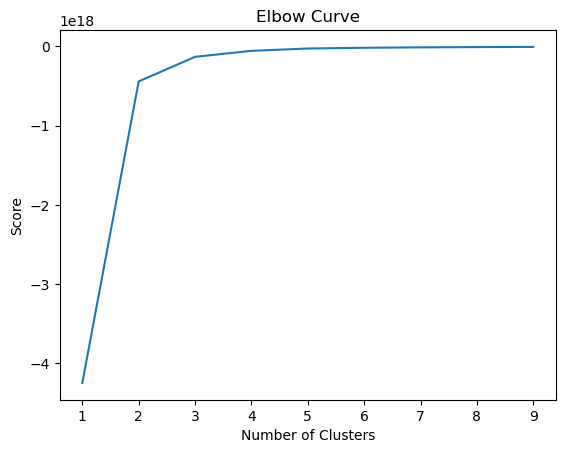

In [22]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The curve starts to straigten out at 3. That means that the optimal count of clusters is 3. 

# 04. k-means clustering

In [23]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3)

In [24]:
# Fit the k-means object to the data.

kmeans.fit(df)

C:\Users\alabaro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\alabaro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [25]:
# Create column in df that contains the assigned cluster for each row

df['clusters'] = kmeans.fit_predict(df)

C:\Users\alabaro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\alabaro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\alabaro\AppData\Local\Temp\ipykernel_4828\3290455480.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clusters'] = kmeans.fit_predict(df)


In [26]:
# check output

df.head(2)

,pop_2022,gini,EPI.new,HLT.new,AIR.new,HAD.new,PMD.new,OZD.new,NOE.new,SOE.new,COE.new,VOE.new,H2O.new,USD.new,UWD.new,HMT.new,PBD.new,WMG.new,MSW.new,REC.new,OCP.new,ECO.new,BDH.new,TBN.new,TBG.new,MPA.new,PAR.new,SHI.new,SPI.new,BHV.new,ECS.new,TCL.new,GRL.new,WTL.new,FSH.new,FSS.new,RMS.new,FTD.new,ACD.new,SDA.new,NXA.new,AGR.new,SPU.new,SNM.new,WRS.new,WWT.new,PCC.new,CCH.new,CDA.new,CHA.new,FGA.new,NDA.new,BCA.new,GHN.new,LCB.new,GIB.new,GHP.new,clusters
0,41128771,36.125,43.6,16.0,15.5,7.4,16.0,18.4,37.8,61.2,42.7,37.5,28.1,28.4,27.8,0.0,0.0,4.4,1.1,11.1,36.0,36.9,30.7,20.6,51.5,7.8,5.2,90.8,13.4,41.9,61.8,58.3,44.8,100.0,19.2,30.1,13.6,10.15,35.5,0.0,71.0,44.2,37.3,51.0,0.0,0.0,65.6,65.6,83.9,50.2,61.4,63.7,42.9,45.3,100.0,77.5,100.0,0
1,35588987,51.300,30.5,20.5,23.1,17.9,24.0,36.8,32.4,60.2,30.3,8.3,12.8,14.1,12.0,36.7,36.7,9.6,0.0,19.0,19.5,28.6,30.1,34.1,36.6,0.0,30.2,88.4,31.8,61.5,29.4,15.5,41.7,100.0,24.3,43.9,17.6,7.90,50.5,39.0,61.9,24.9,20.4,29.3,0.0,0.0,37.7,37.7,39.0,49.7,57.7,70.4,51.8,26.4,37.9,45.2,62.3,0


In [27]:
# check output for the clusters column

df['clusters'].value_counts()

clusters
0    163
2     14
1      2
Name: count, dtype: int64

In [28]:
# export df

df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'cluster.csv'))

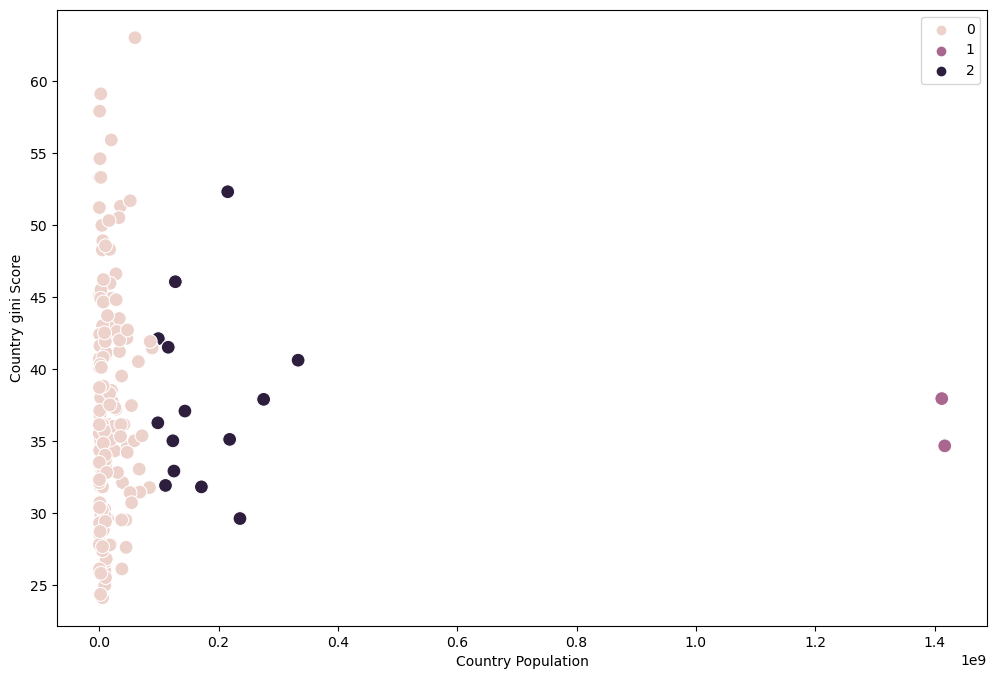

In [39]:
# Plot the clusters for the country population and gini score

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['pop_2022'], y=df['gini'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Country Population')
plt.ylabel('Country gini Score')
plt.show()

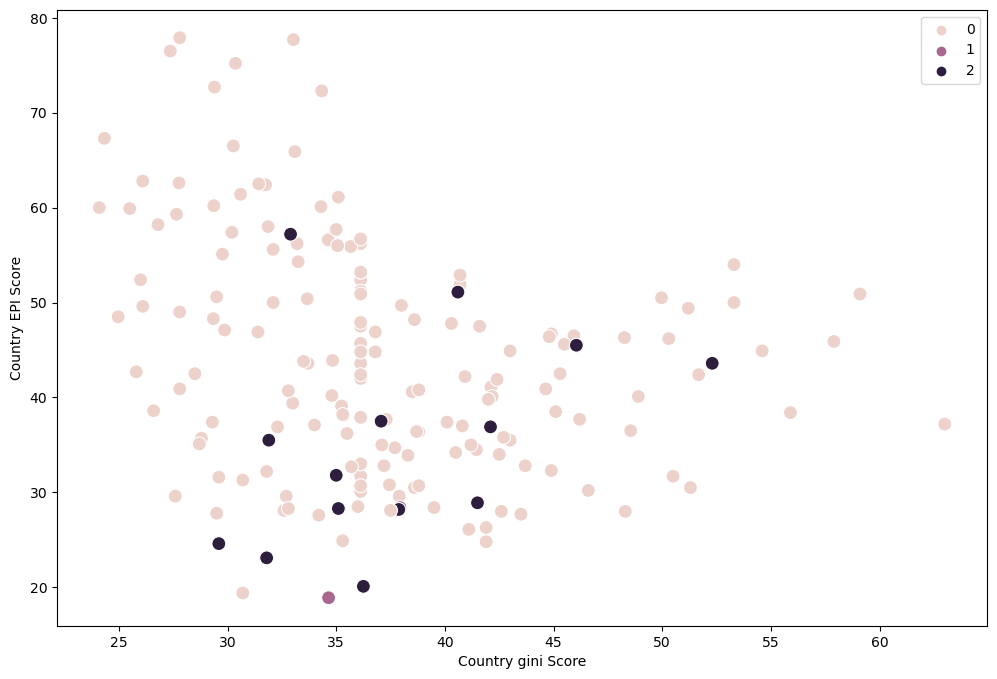

In [40]:
# Plot the clusters for the gini and EPI scores

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['gini'], y=df['EPI.new'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Country gini Score')
plt.ylabel('Country EPI Score')
plt.show()

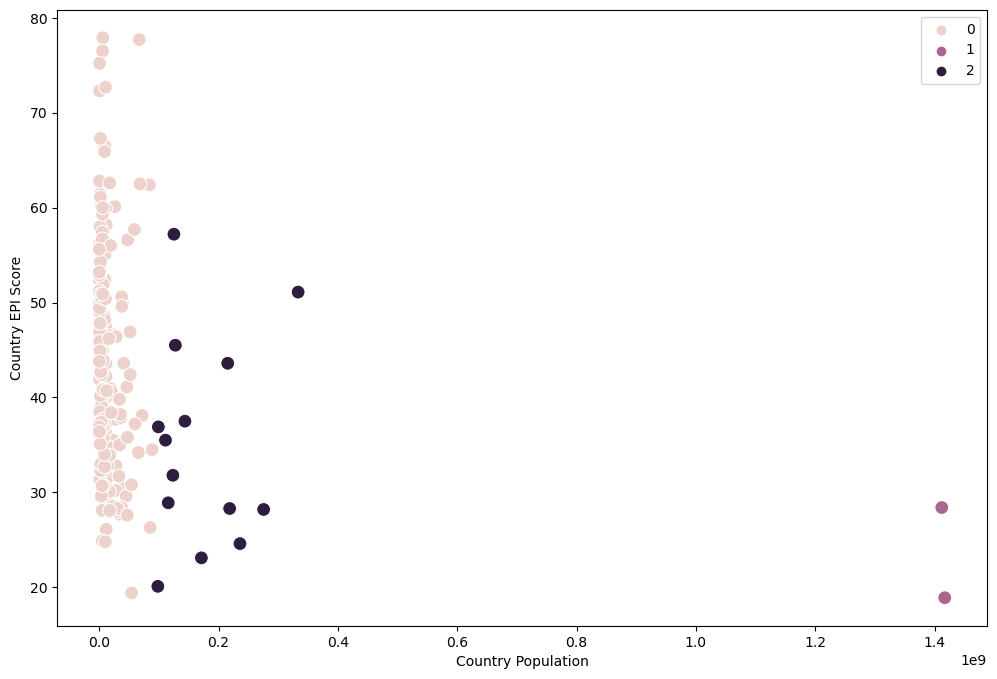

In [41]:
# Plot the clusters for the country population and EPI score

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['pop_2022'], y=df['EPI.new'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Country Population')
plt.ylabel('Country EPI Score')
plt.show()

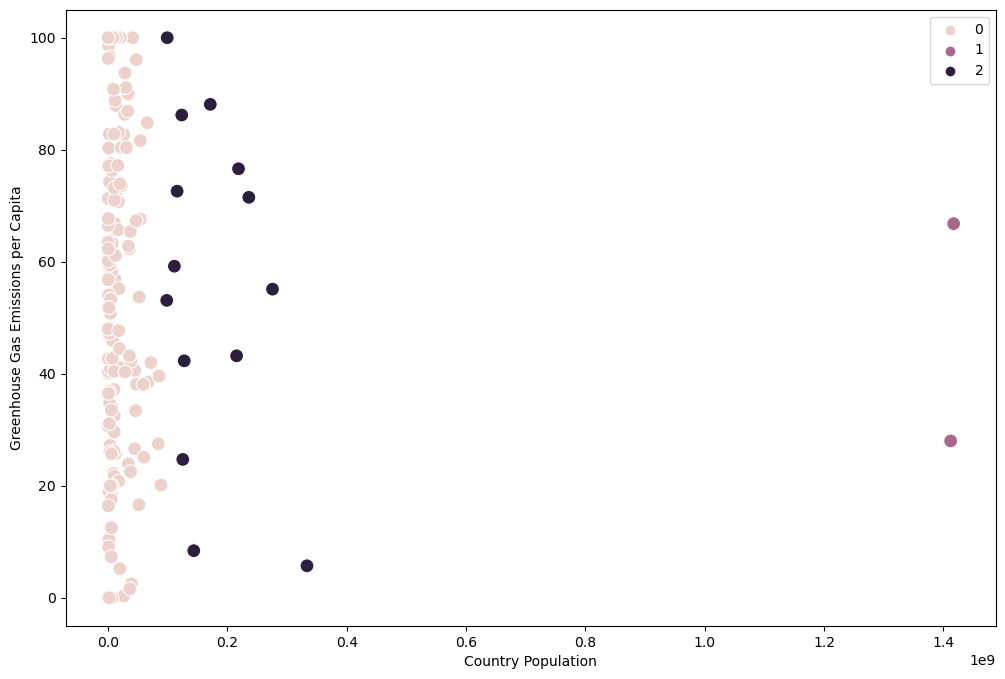

In [42]:
# Plot the clusters for the country population and EPI score

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['pop_2022'], y=df['GHP.new'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Country Population')
plt.ylabel('Greenhouse Gas Emissions per Capita')
plt.show()

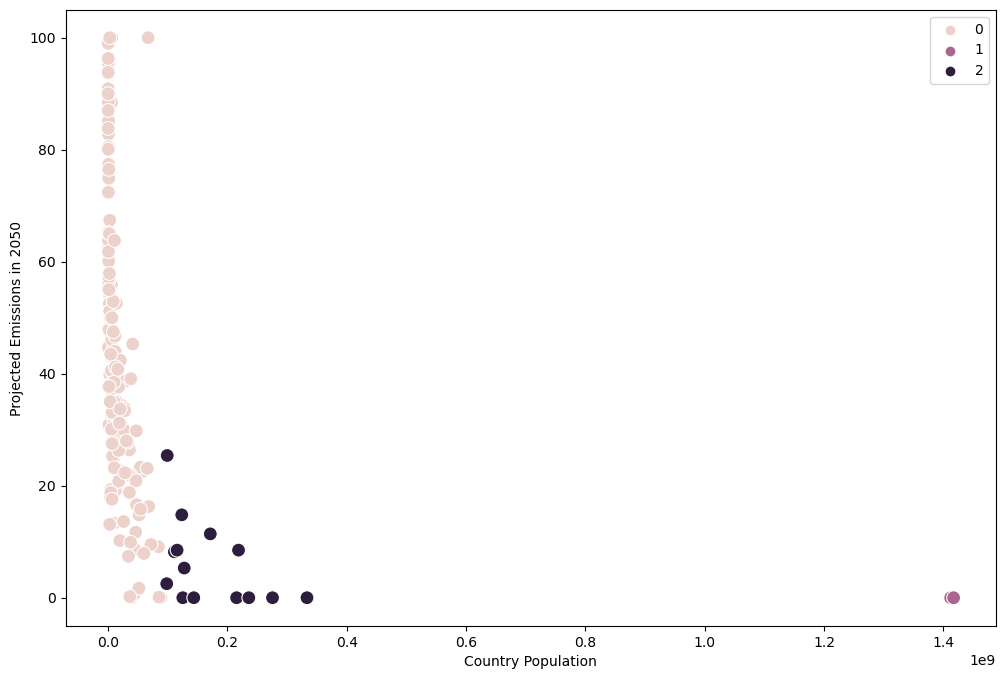

In [43]:
# Plot the clusters for the country population and EPI score

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['pop_2022'], y=df['GHN.new'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Country Population')
plt.ylabel('Projected Emissions in 2050')
plt.show()

In [44]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\alabaro\AppData\Local\Temp\ipykernel_4972\4155924145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'


In [46]:
df.groupby('cluster').agg({'pop_2022':['mean', 'median','min','max'], 
                         'gini':['mean', 'median','min','max'], 
                         'EPI.new':['mean', 'median','min','max'],
                          'GHP.new':['mean', 'median','min','max'],
                          'GHN.new':['mean', 'median','min','max']})

pop_2022                                             gini  \
                     mean        median         min         max       mean   
cluster                                                                      
dark purple  1.709261e+08  1.355299e+08    98186856   333287557  37.860476   
pink         1.575578e+07  6.948392e+06       41569    88550570  37.230869   
purple       1.414674e+09  1.414674e+09  1412175000  1417173173  36.291667   

                                            EPI.new                     \
                median    min        max       mean median   min   max   
cluster                                                                  
dark purple  36.658333  29.60  52.300000  35.164286  33.65  20.1  57.2   
pink         36.125000  24.10  63.000000  44.010429  42.40  19.4  77.9   
purple       36.291667  34.65  37.933333  23.650000  23.65  18.9  28.4   

               GHP.new                        GHN.new                     
                  mean median   min    max       mean median  min    max  
cluster                                                                   
dark purple  56.192857  57.15   5.7  100.0   6.042857    3.9  0.0   25.4  
pink         50.484049  51.80   0.0  100.0  43.522086   39.1  0.0  100.0  
purple       47.400000  47.40  28.0   66.8   0.000000    0.0  0.0    0.0

# 05. Interpretation and next steps

PINK CLUSTER - small populations, higher EPI scores
Countries in the pink cluster have the smallest populations, but these range widely from less than 50k to 86m people. These countries have the highest overall EPI scores (median is 44). This group contains the highest EPI score of 77.9. 

DARK PURPLE CLUSTER
Countries in the dark purple cluster have medium sized populations, but these range widely from 98m to 333m people. 

PURPLE CLUSTER - large populations, low EPI scores
Countries in the dark purple cluster are the largest, with populations greater than 1.4b people. These countries have the lowest overall EPI scores (median is 23). This group contains the lowest EPI score of 18.9. 
    
A country's gini score doesn't seem to have much of an impact. The medium gini scores for all countries is around 36. 

In the middle subset of data (countries with medium populations) it's difficult to distinguish a trend that stands out. However, it's clear that the countries with smaller populations has the highest EPI score, while the countries with the largest populations has the lowest EPI scores. Population size at the extreme ends of the spectrum seem to have an impact in a country's overall EPI score. 

When it comes to a country's GHP (greenhouse gas emmision per capital), it's difficult to distinguish a pattern because the medians across all clusters is around 50, but can range from 0 to 100. But when it comes to GHN (projected emissions in 2050), the largest countries do the worst with scores at 0. And the smaller countries do the best, as this group (the pink cluster) contains the highest GHN score of 100. The medium sized contries (dark purple cluster) only do slightly better than the largest countries with a median GHN score of 3.9. 

Based on these results, future analysis should focus on the extreme ends of the spectrum. We should look at the top 10-20 countries with the highest EPI scores and the bottom 10-20 countries with the lowest EPI scores. We could compare and contrast different attributes of those two groups to see if there are any lessons learned that can be applied by low-scoring countries to improve their environmental protection policies and practices. 